<a href="https://colab.research.google.com/github/abrahamzetz/hyperisland/blob/module4_data_analysis/Project_4_Inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Load some libraries we need
import pandas as pd
%load_ext google.colab.data_table
import sqlite3 as sql
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np


import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
'# Mount Google Drive'
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
% cd gdrive/MyDrive/Colab\ Notebooks

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
# We connect to the database
# Be careful to the path, better to copy/paste it
db_conn = sql.connect("/content/gdrive/MyDrive/inequality.db")

# SQL Template

During the same session you do not need to rerun any of the above, just run it once and you are good to go!
    

From now everytime you want to write SQL just copy and past this, write this:
```
pd.read_sql(
  """
        SQL HERE
        SQL HERE
        SQL HERE

  """, db_conn)
```


    

  

In [ ]:
#show all tables

pd.read_sql(
  """
        select *
        from sqlite_master
        
  """, db_conn)

,type,name,tbl_name,rootpage,sql
0,table,continent,continent,412,"CREATE TABLE ""continent"" (\n""continent"" TEXT,\..."
1,table,alcohol,alcohol,6,"CREATE TABLE ""alcohol"" (\n""country"" TEXT,\n ""..."
2,table,gini,gini,2,"CREATE TABLE ""gini"" (\n""country"" TEXT,\n ""yea..."
3,table,fertility,fertility,10,"CREATE TABLE ""fertility"" (\n""country"" TEXT,\n ..."
4,table,gini_2019,gini_2019,16,"CREATE TABLE ""gini_2019"" (\n""country"" TEXT,\n ..."
5,table,happiness_2019,happiness_2019,15,"CREATE TABLE ""happiness_2019"" (\n""Country"" TEX..."
6,table,life_expectancy,life_expectancy,8,"CREATE TABLE ""life_expectancy"" (\n""Country"" TE..."
7,table,life_expectancy_2019,life_expectancy_2019,14,"CREATE TABLE ""life_expectancy_2019"" (\n""Countr..."
8,table,happiness,happiness,4,"CREATE TABLE ""happiness"" (\n""Country"" TEXT,\n ..."
9,table,life_expectancy_compare,life_expectancy_compare,5,"CREATE TABLE ""life_expectancy_compare"" (\n""cou..."


#Color Palette

In [ ]:
'#09bb9f' #North America
'#fcb82a' #South America
'#62b0da' #Europe
'#97691d' #Africa
'#e55b47' #Asia
'#bf84c1' #Oceania

#Preparing the database

In [ ]:
#import csv to DataFrame

path = "/content/gdrive/MyDrive/data/tax_rate.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#check if data is correctly stored in DataFrame
print (df)

                  country  tax_rate
0             Afghanistan      36.1
1                  Angola      49.0
2                 Albania      36.9
3    United Arab Emirates      15.9
4               Argentina     138.0
..                    ...       ...
184                 Samoa      18.1
185                 Yemen      26.6
186          South Africa      28.8
187                Zambia      18.6
188              Zimbabwe      31.6

[189 rows x 2 columns]


In [ ]:
#convert the data from DataFrame to SQL table

df.to_sql('tax_rate', db_conn, if_exists='replace', index = False)

In [ ]:
#Deleting Table

#Creating a cursor object using the cursor() method
cursor = db_conn.cursor()

#Doping EMPLOYEE table if already exists
cursor.execute("DROP TABLE gini")
print("Table dropped... ")

#Commit your changes in the database
db_conn.commit()


Table dropped... 


#Level 1 - Description

In [ ]:
#Calculate the global mean of gini

pd.read_sql(
  """
        
        select round(avg(gini),2) as global_gini
        from gini
        
 
  """, db_conn)

,global_gini
0,38.52


In [ ]:
#Calculate the gini mean for each continent

pd.read_sql(
  """
        
        select c.continent, Round(avg(g.gini),2) as continent_gini
        from gini g
        join continent c
          on c.country = g.country
        group by continent
        
 
  """, db_conn)

,continent,continent_gini
0,Africa,41.93
1,Asia,35.81
2,Europe,32.63
3,North America,44.57
4,Oceania,37.38
5,South America,46.45


In [ ]:
#Difference between global mean and mean per country

pd.read_sql(
  """
        with global_mean as (
          select avg(gini) as global_gini
          from gini
        ),

        continent_mean as (
           select c.continent, avg(g.gini) as continent_gini
           from gini g
           join continent c
             on c.country = g.country
           group by continent
        )


        select 
            continent,
            round(continent_gini, 2) as continent_gini,
            round(global_gini, 2) as global_gini,
            round((continent_gini - global_gini),2) as difference
        from continent_mean, global_mean
        order by 2
        
 
  """, db_conn)

,continent,continent_gini,global_gini,difference
0,Europe,32.63,38.52,-5.89
1,Asia,35.81,38.52,-2.71
2,Oceania,37.38,38.52,-1.14
3,Africa,41.93,38.52,3.41
4,North America,44.57,38.52,6.05
5,South America,46.45,38.52,7.93


In [ ]:
#Boxplot with Python

 
# Creating dataset

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="Africa"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_africa = np.array(alist)

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="Asia"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_asia = np.array(alist)

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="Europe"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_europe = np.array(alist)

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="North America"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_namerica = np.array(alist)

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="South America"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_samerica = np.array(alist)

cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country) where continent="Oceania"')
alist = cursor.fetchall()
len(alist)
alist[0]
data_oceania = np.array(alist)

#data = [data_africa, data_asia, data_europe, data_namerica, data_samerica, data_oceania]
data =  [data_namerica, data_samerica, data_europe, data_africa, data_asia, data_oceania]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


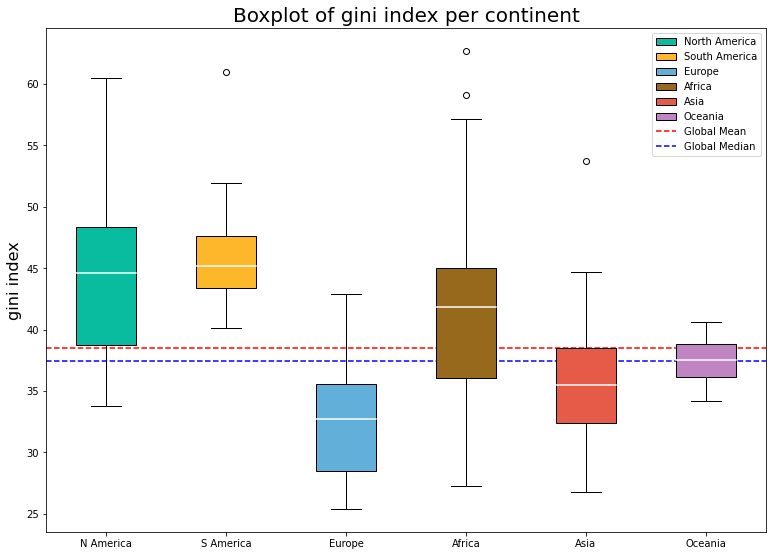

In [ ]:
#Creating boxplot

#create the chart foundation and size
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#give name to y axis, title, x axis
ax.set_ylabel('gini index', fontsize=16)
ax.set_title('Boxplot of gini index per continent', fontsize=20)
plt.xticks([], ['N America', 'S America', 'Europe', 'Africa', 'Asia', 'Oceania'])


#find median and mean
cursor = db_conn.cursor()
cursor.execute('SELECT gini from gini join continent using(country)')
alist = cursor.fetchall()
data_global = np.array(alist)
gmed = np.median(data_global)
gm = np.mean(data_global)

#draw a line for global mean
gmline = plt.axhline(y=gm, color='r', linestyle='--', label='Global Mean')

#draw a line for global median
gmedline = plt.axhline(y=gmed, color='b', linestyle='--', label='Global Median')


# Creating plot
bp = ax.boxplot(data, patch_artist=True, medianprops=dict(color="white", linewidth=1.5))

#fill with colors
#colors = ['#97691d', '#e55b47', '#62b0da', '#09bb9f', '#fcb82a', '#bf84c1']
colors = ['#09bb9f', '#fcb82a',  '#62b0da', '#97691d', '#e55b47', '#bf84c1']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Show legend
ax.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2],bp["boxes"][3],bp["boxes"][4],bp["boxes"][5], gmline, gmedline], ['North America', 'South America', 'Europe', 'Africa', 'Asia', 'Oceania', 'Global Mean', 'Global Median'])

# show plot
plt.show()

#Old



In [ ]:
#create new table with all data


inequality = pd.read_sql(
  """

        select 
            g.country,
            c.continent,
            l.Status as status,
            g.gini,
            g2.gini as gini_2019, 
            l.Life_expectancy as life_expectancy,
            f.fertility_rate,
            a.consumption as alcohol_consumption,
            round(h.Happiness_Score, 2) as happiness_score,
            round(h2.Happiness_Score, 2) as happiness_score_2019,
            round(l2.Life_expectancy_2019, 2) as life_expectancy_2019
        from gini g
        join happiness h
          on h.Country = g.country
        join life_expectancy l
          on l.Country = g.country
        join alcohol a
          on a.country = g.country
        join fertility f
          on f.country = g.country
        join continent c
          on c.country = g.country
        join happiness_2019 as h2
          on h2.Country = g.country
        join gini_2019 as g2
          on g2.country = g.country
        join life_expectancy_2019 as l2
          on l2.country = g.country
 
  """, db_conn)

#Level 2 - Correlation

In [ ]:
#create new table with all data


inequality = pd.read_sql(
  """

        select 
            g.country,
            c.continent,
            l.Status as status,
            g.gini,
            l.Life_expectancy as life_expectancy,
            f.fertility_rate,
                case when l.Status = 'Developed' then 1
                else 0 end as status_bool,
            round(h.Happiness_Score, 2) as happiness_score
        from gini g
        join happiness h
          on h.Country = g.country
        join life_expectancy l
          on l.Country = g.country
        join fertility f
          on f.country = g.country
        join continent c
          on c.country = g.country
  """, db_conn)

In [ ]:
#check correlation coefficient

coeff= inequality.corr()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(coeff)


                     gini  life_expectancy  fertility_rate  status_bool  \
gini             1.000000        -0.423278        0.313512    -0.396168   
life_expectancy -0.423278         1.000000       -0.832043     0.538812   
fertility_rate   0.313512        -0.832043        1.000000    -0.433168   
status_bool     -0.396168         0.538812       -0.433168     1.000000   
happiness_score -0.236234         0.755136       -0.639674     0.466198   

                 happiness_score  
gini                   -0.236234  
life_expectancy         0.755136  
fertility_rate         -0.639674  
status_bool             0.466198  
happiness_score         1.000000  


In [ ]:
#Set to presentation mode (bigger text on graph)
sns.set_context("talk")


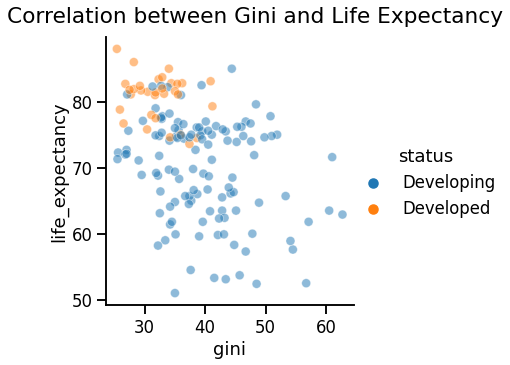

In [ ]:
#Correlation between Gini and Life Expectancy

g = sns.relplot(
    x="gini",
    y="life_expectancy",
    data=inequality,
    kind="scatter",
    hue="status",
    alpha=0.5
)

g.fig.suptitle("Correlation between Gini and Life Expectancy", y=1.03)

plt.show()

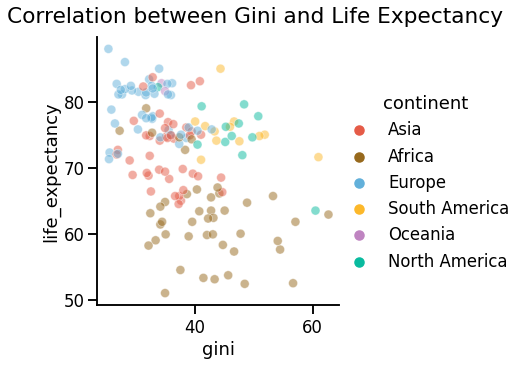

In [ ]:
#Correlation between Gini and Life Expectancy

#Set custom color
custom_palette = ['#e55b47', '#97691d', '#62b0da', '#fcb82a', '#bf84c1', '#09bb9f']
sns.set_palette(custom_palette)

#Set custom category
#category_order = ['North America', 'South America', 'Europe', 'Africa', 'Asia', 'Oceania']

g = sns.relplot(
    x="gini",
    y="life_expectancy",
    data=inequality,
    kind="scatter",
    hue="continent",
    alpha=0.5,

)

g.fig.suptitle("Correlation between Gini and Life Expectancy", y=1.03)

plt.show()

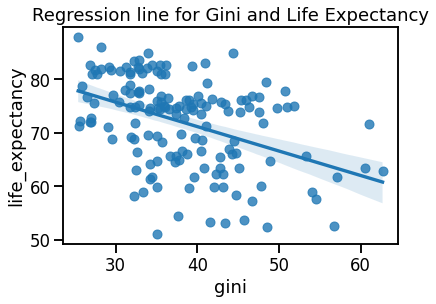

In [ ]:
#Regression line for Gini and Life Expectancy

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality
)

g.set_title("Regression line for Gini and Life Expectancy")

plt.show()

In [ ]:
#Regression line for Gini and Life Expectancy dummy model

y = inequality['life_expectancy']
x1 = inequality[['gini', 'status_bool']]

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     38.81
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           2.70e-14
Time:                        15:06:43   Log-Likelihood:                -506.00
No. Observations:                 152   AIC:                             1018.
Df Residuals:                     149   BIC:                             1027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.3868      3.168     25.376      

In [ ]:
#Regression line for Gini and Life Expectancy dummy model

y = inequality['life_expectancy']
x1 = inequality['gini']

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     32.74
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.54e-08
Time:                        15:09:56   Log-Likelihood:                -522.87
No. Observations:                 152   AIC:                             1050.
Df Residuals:                     150   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.4705      3.112     28.755      0.0

In [ ]:
#Summary for the model life expectancy vs gini

mdl_life_vs_gini= ols("life_expectancy ~ gini", data=inequality).fit()
print(mdl_life_vs_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     32.74
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.54e-08
Time:                        15:09:19   Log-Likelihood:                -522.87
No. Observations:                 152   AIC:                             1050.
Df Residuals:                     150   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.4705      3.112     28.755      0.0

In [ ]:
#Summary for the model life expectancy vs gini

mdl_life_vs_gini= ols("life_expectancy ~ gini + status_bool", data=inequality).fit()
print(mdl_life_vs_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     38.81
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           2.70e-14
Time:                        15:09:34   Log-Likelihood:                -506.00
No. Observations:                 152   AIC:                             1018.
Df Residuals:                     149   BIC:                             1027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      80.3868      3.168     25.376      

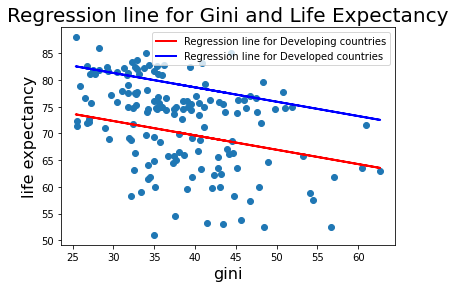

In [ ]:
plt.scatter(inequality['gini'], y)
yhat_developing = 80.3868 + (-0.2688*inequality['gini'])
yhat_developed = 89.3802 + (-0.2688*inequality['gini'])

fig = plt.plot(inequality['gini'], yhat_developing, lw=2, c='red', label='Regression line for Developing countries')
fig = plt.plot(inequality['gini'], yhat_developed, lw=2, c='blue', label='Regression line for Developed countries')
plt.xlabel("gini", fontsize=16)
plt.ylabel("life expectancy", fontsize=16)
plt.title("Regression line for Gini and Life Expectancy", fontsize=20)
plt.legend()
plt.show()


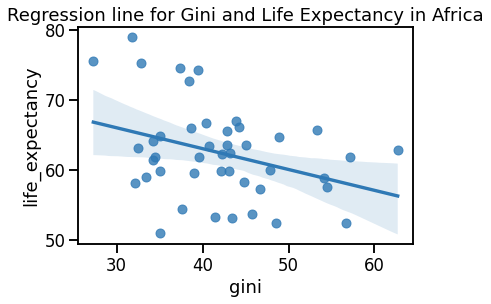

In [ ]:
#Regression line for Gini and Life Expectancy Africa

sns.set_palette(None)

continent = "Africa"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

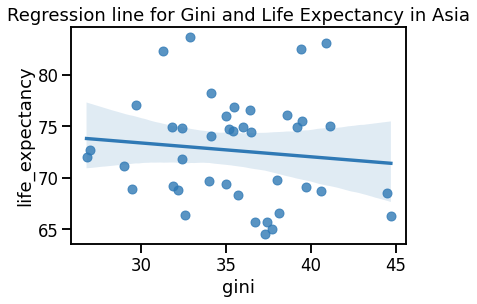

In [ ]:
#Regression line for Gini and Life Expectancy Asia

sns.set_palette(None)

continent = "Asia"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

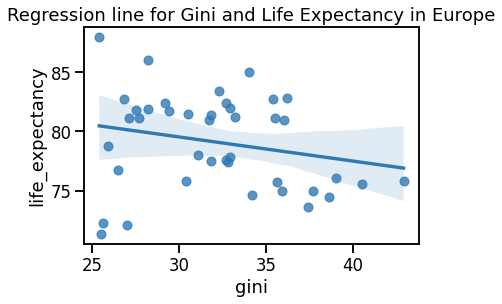

In [ ]:
#Regression line for Gini and Life Expectancy Europe

sns.set_palette(None)

continent = "Europe"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

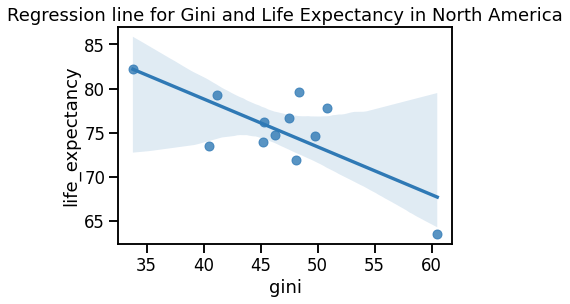

In [ ]:
#Regression line for Gini and Life Expectancy North America

sns.set_palette(None)

continent = "North America"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

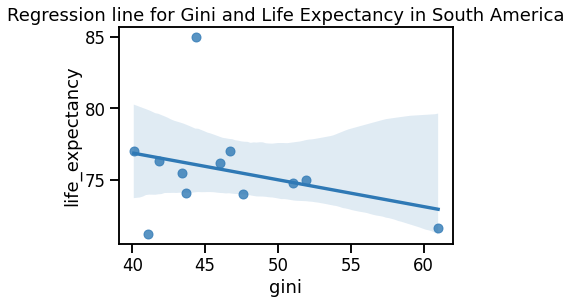

In [ ]:
#Regression line for Gini and Life Expectancy South America

sns.set_palette(None)

continent = "South America"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

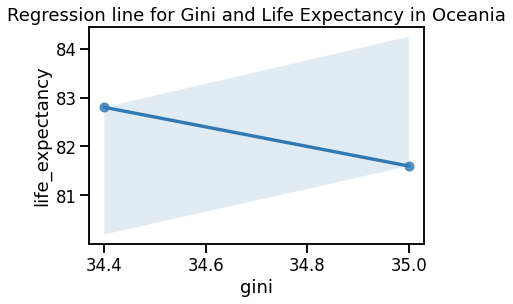

In [ ]:
#Regression line for Gini and Life Expectancy Oceania

sns.set_palette(None)

continent = "Oceania"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.continent == continent]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(continent))

plt.show()

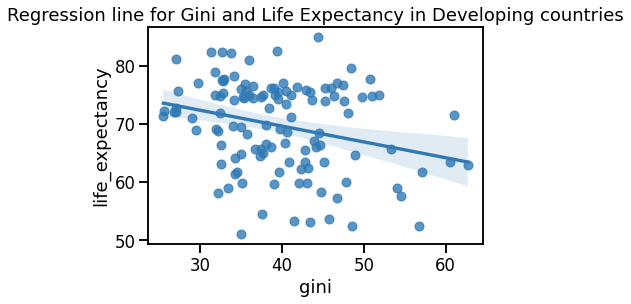

In [ ]:
#Regression line for Gini and Life Expectancy Developing

sns.set_palette(None)

status = "Developing"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(status) + " countries")

plt.show()

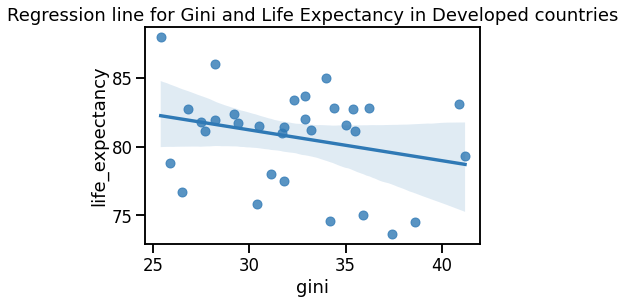

In [ ]:
#Regression line for Gini and Life Expectancy Developed

sns.set_palette(None)

status = "Developed"

g = sns.regplot(
    x = "gini",
    y = "life_expectancy",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Gini and Life Expectancy in " + str(status) + " countries")

plt.show()

In [ ]:
#Summary for the model life expectancy vs gini

mdl_life_vs_gini= ols("life_expectancy ~ gini", data=inequality).fit()
print(mdl_life_vs_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     32.74
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           5.54e-08
Time:                        13:36:42   Log-Likelihood:                -522.87
No. Observations:                 152   AIC:                             1050.
Df Residuals:                     150   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.4705      3.112     28.755      0.0

In [ ]:
#Summary for the model life expectancy vs gini per continent

continent = "Asia"

mdl_life_vs_gini= ols("life_expectancy ~ gini", data=inequality[inequality.continent == continent]).fit()
print(mdl_life_vs_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4828
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.491
Time:                        07:52:23   Log-Likelihood:                -124.38
No. Observations:                  41   AIC:                             252.8
Df Residuals:                      39   BIC:                             256.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.4201      6.921     11.187      0.0

In [ ]:
#Summary for the model life expectancy vs gini per status

status = "Developing"

mdl_life_vs_gini= ols("life_expectancy ~ gini", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())

status = "Developed"

mdl_life_vs_gini= ols("life_expectancy ~ gini", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())


Summary for  Developing  countries
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     9.393
Date:                Mon, 01 Nov 2021   Prob (F-statistic):            0.00270
Time:                        09:43:56   Log-Likelihood:                -410.60
No. Observations:                 120   AIC:                             825.2
Df Residuals:                     118   BIC:                             830.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.

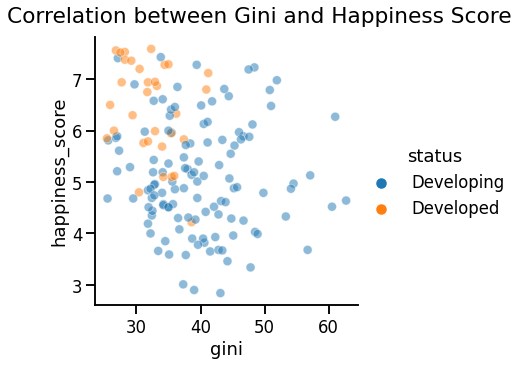

In [ ]:
#Correlation between Gini and Life Expectancy

g = sns.relplot(
    x="gini",
    y="happiness_score",
    data=inequality,
    kind="scatter",
    hue="status",
    alpha=0.5
)

g.fig.suptitle("Correlation between Gini and Happiness Score", y=1.03)

plt.show()

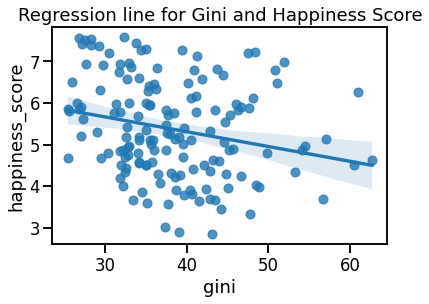

In [ ]:
#Regression line for Gini and Happiness Score

g = sns.regplot(
    x = "gini",
    y = "happiness_score",
    data = inequality
)

g.set_title("Regression line for Gini and Happiness Score")

plt.show()

In [ ]:
#Summary for the model happiness score vs gini

mdl_happiness_vs_gini= ols("happiness_score ~ gini", data=inequality).fit()
print(mdl_happiness_vs_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.078
Date:                Tue, 26 Oct 2021   Prob (F-statistic):            0.00517
Time:                        11:29:46   Log-Likelihood:                -215.18
No. Observations:                 139   AIC:                             434.4
Df Residuals:                     137   BIC:                             440.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8058      0.503     13.539      0.0

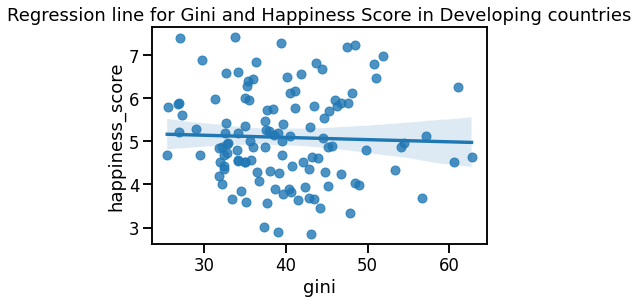

In [ ]:
#Regression line for Gini and Happiness Score Developing

sns.set_palette(None)

status = "Developing"

g = sns.regplot(
    x = "gini",
    y = "happiness_score",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Gini and Happiness Score in " + str(status) + " countries")

plt.show()

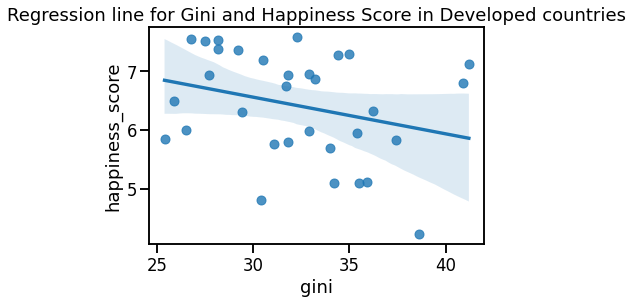

In [ ]:
#Regression line for Gini and Happiness Score Developed

sns.set_palette(None)

status = "Developed"

g = sns.regplot(
    x = "gini",
    y = "happiness_score",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Gini and Happiness Score in " + str(status) + " countries")

plt.show()

In [ ]:
#Summary for the model happiness score vs gini per status

status = "Developing"

mdl_life_vs_gini= ols("happiness_score ~ gini", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())

status = "Developed"

mdl_life_vs_gini= ols("happiness_score ~ gini", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())


Summary for  Developing  countries
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1618
Date:                Mon, 01 Nov 2021   Prob (F-statistic):              0.688
Time:                        09:46:33   Log-Likelihood:                -176.74
No. Observations:                 120   AIC:                             357.5
Df Residuals:                     118   BIC:                             363.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.

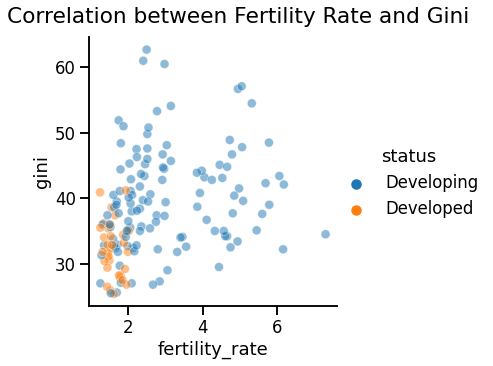

In [ ]:
#Correlation between Fertility Rate and Gini

g = sns.relplot(
    x="fertility_rate",
    y="gini",
    data=inequality,
    kind="scatter",
    hue="status",
    alpha=0.5
)

g.fig.suptitle("Correlation between Fertility Rate and Gini", y=1.03)

plt.show()

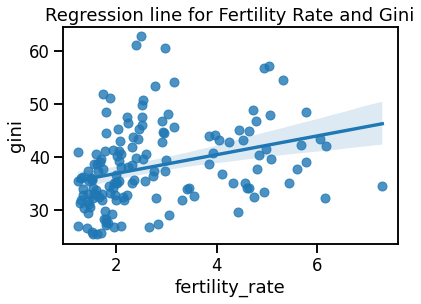

In [ ]:
#Regression line for Fertility Rate and Gini

g = sns.regplot(
    x="fertility_rate",
    y="gini",
    data = inequality
)

g.set_title("Regression line for Fertility Rate and Gini")

plt.show()

In [ ]:

mdl_gini_vs_fertility= ols("gini ~ fertility_rate", data=inequality).fit()
print(mdl_gini_vs_fertility.summary())


                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     16.35
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           8.39e-05
Time:                        09:52:39   Log-Likelihood:                -518.29
No. Observations:                 152   AIC:                             1041.
Df Residuals:                     150   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.3025      1.344     24.

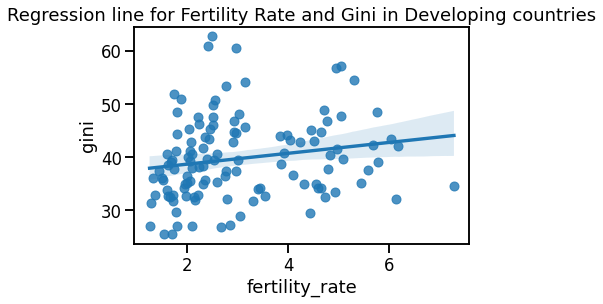

In [ ]:
#Regression line for Fertility Rate and Gini Developing

sns.set_palette(None)

status = "Developing"

g = sns.regplot(
    x = "fertility_rate",
    y = "gini",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Fertility Rate and Gini in " + str(status) + " countries")

plt.show()

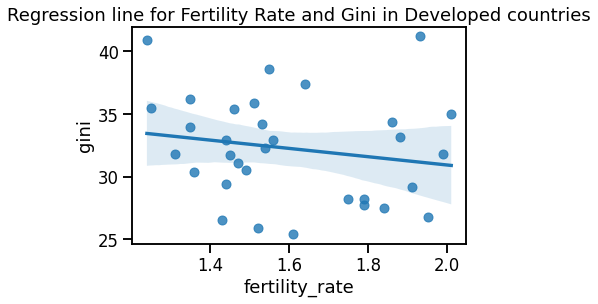

In [ ]:
#Regression line for Fertility Rate and Gini Developed

sns.set_palette(None)

status = "Developed"

g = sns.regplot(
    x = "fertility_rate",
    y = "gini",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Fertility Rate and Gini in " + str(status) + " countries")

plt.show()

In [ ]:
#Summary for the model gini vs fertility per status

status = "Developing"

mdl_life_vs_gini= ols("gini ~ fertility_rate", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())

status = "Developed"

mdl_life_vs_gini= ols("gini ~ fertility_rate", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())

Summary for  Developing  countries
                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.083
Date:                Mon, 01 Nov 2021   Prob (F-statistic):             0.0456
Time:                        09:53:23   Log-Likelihood:                -412.84
No. Observations:                 120   AIC:                             829.7
Df Residuals:                     118   BIC:                             835.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept

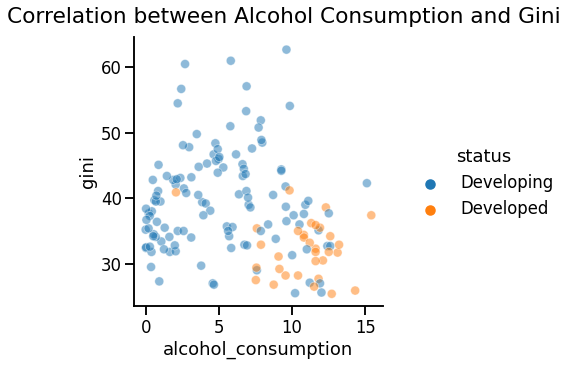

In [ ]:
#Correlation between Alcohol Consumption and Gini

g = sns.relplot(
    x="alcohol_consumption",
    y="gini",
    data=inequality,
    kind="scatter",
    hue="status",
    alpha=0.5
)

g.fig.suptitle("Correlation between Alcohol Consumption and Gini", y=1.03)

plt.show()

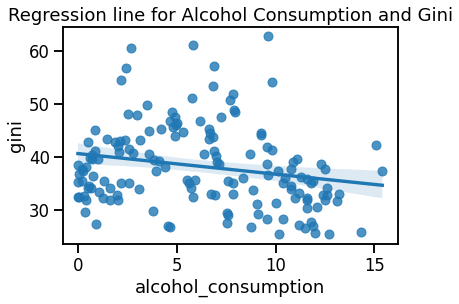

In [ ]:
#Regression line for Alcohol Consumption and Gini

g = sns.regplot(
    x="alcohol_consumption",
    y="gini",
    data = inequality
)

g.set_title("Regression line for Alcohol Consumption and Gini")

plt.show()

In [ ]:

mdl_gini_vs_alcohol= ols("gini ~ alcohol_consumption", data=inequality).fit()
print(mdl_gini_vs_alcohol.summary())


                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.046
Date:                Mon, 25 Oct 2021   Prob (F-statistic):            0.00880
Time:                        09:53:47   Log-Likelihood:                -522.66
No. Observations:                 152   AIC:                             1049.
Df Residuals:                     150   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              40.6068    

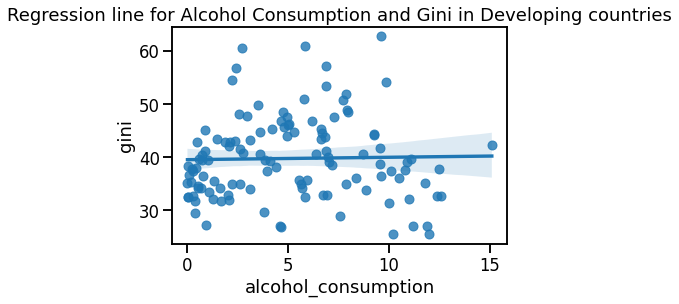

In [ ]:
#Regression line for Alcohol Consumption and Gini Developing

sns.set_palette(None)

status = "Developing"

g = sns.regplot(
    x = "alcohol_consumption",
    y = "gini",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Alcohol Consumption and Gini in " + str(status) + " countries")

plt.show()

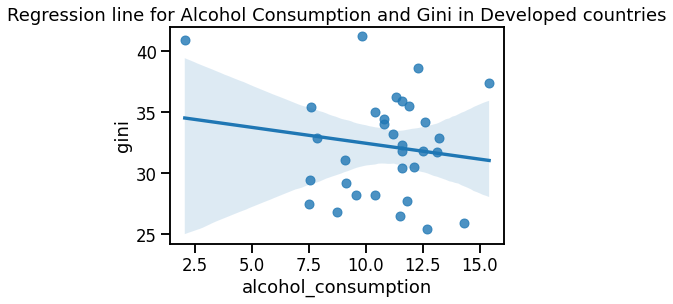

In [ ]:
#Regression line for Alcohol Consumption and Gini Developed

sns.set_palette(None)

status = "Developed"

g = sns.regplot(
    x = "alcohol_consumption",
    y = "gini",
    data = inequality[inequality.status == status]
)

g.set_title("Regression line for Alcohol Consumption and Gini in " + str(status) + " countries")

plt.show()

In [ ]:
#Summary for the model gini vs alcohol per status

status = "Developing"

mdl_life_vs_gini= ols("gini ~ alcohol_consumption", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())

status = "Developed"

mdl_life_vs_gini= ols("gini ~ alcohol_consumption", data=inequality[inequality.status == status]).fit()
print("Summary for ", status, " countries")
print(mdl_life_vs_gini.summary())


Summary for  Developing  countries
                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.05753
Date:                Mon, 01 Nov 2021   Prob (F-statistic):              0.811
Time:                        09:50:14   Log-Likelihood:                -414.85
No. Observations:                 120   AIC:                             833.7
Df Residuals:                     118   BIC:                             839.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

#Level 3 - Prediction

In [ ]:
#create new table with data from 2015 and 2019


inequality_predict = pd.read_sql(
  """

        select 
            g.country,
            g.gini,
            g2.gini as gini_2019, 
            round(h.Happiness_Score, 2) as happiness_score,
            round(h2.Happiness_Score, 2) as happiness_score_2019,
            l.Life_expectancy as life_expectancy,
            round(l2.Life_expectancy_2019, 2) as life_expectancy_2019
        from gini g
        join happiness h
          on h.Country = g.country
        join life_expectancy l
          on l.Country = g.country
        join happiness_2019 as h2
          on h2.Country = g.country
        join gini_2019 as g2
          on g2.country = g.country
        join life_expectancy_2019 as l2
          on l2.country = g.country
 
  """, db_conn)

In [ ]:


X = inequality_predict[['gini', 'happiness_score']]
y = inequality_predict['life_expectancy']

regr = linear_model.LinearRegression()
regr.fit(X,y)

print(regr.coef_)



[-0.27208089  4.88465406]


In [ ]:

mdl_life_vs_happiness_gini= ols("life_expectancy ~ happiness_score + gini", data=inequality_predict).fit()
print(mdl_life_vs_happiness_gini.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     101.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           9.09e-27
Time:                        13:20:01   Log-Likelihood:                -387.02
No. Observations:                 127   AIC:                             780.0
Df Residuals:                     124   BIC:                             788.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          56.4746      3.617     

In [ ]:
#predicting happiness score in 2019 based on gini 2019

mdl_happiness_vs_gini= ols("happiness_score ~ gini", data=inequality_predict).fit()

explanatory_data = pd.DataFrame({"gini": inequality_predict["gini_2019"]})


print(mdl_happiness_vs_gini.predict(explanatory_data))

0      5.391697
1      5.560694
2      5.831089
3      5.196412
4      5.684625
         ...   
122    5.493095
123    5.429252
124    4.430292
125    4.663132
126    4.918505
Length: 127, dtype: float64


In [ ]:
#predicting life expectancy 2019 based on happiness score 2019 and gini 2019

mdl_life_vs_happiness_gini= ols("life_expectancy ~ happiness_score + gini", data=inequality_predict).fit()
#print(mdl_life_vs_happiness_gini.summary())


explanatory_data = pd.DataFrame({"happiness_score": inequality_predict["happiness_score_2019"],
                                "gini": inequality_predict["gini_2019"]})


prediction_data = explanatory_data.assign(
life_expectancy=mdl_life_vs_happiness_gini.predict(explanatory_data) )
print(prediction_data)

     happiness_score  gini  life_expectancy
0               3.20  37.7        61.848038
1               4.72  33.2        70.497076
2               6.83  26.0        82.762678
3               6.09  42.9        74.549867
4               4.56  29.9        70.613398
..               ...   ...              ...
122             6.17  35.0        77.090079
123             3.38  36.7        62.999356
124             4.72  63.3        62.307441
125             4.11  57.1        61.014703
126             3.66  50.3        60.666759

[127 rows x 3 columns]


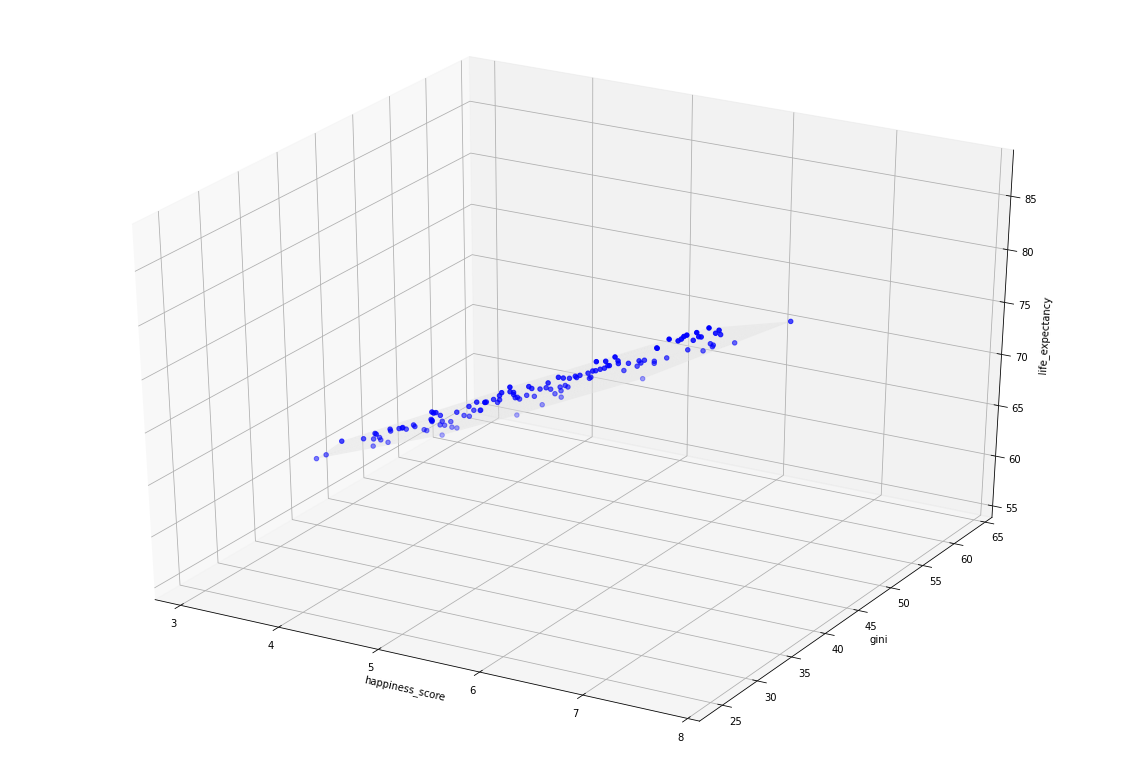

In [ ]:
#visualize prediction for 2019

csvData = np.array(prediction_data)
csvData = csvData.astype(np.float)
X, Y, Z = csvData[:,0], csvData[:,1], csvData[:,2]

fig = plt.figure(figsize =(20, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', alpha=0.5)
ax.scatter(X, Y, Z, c='blue')
ax.set_xlabel("happiness_score")
ax.set_ylabel("gini")
ax.set_zlabel("life_expectancy")
plt.show()

In [ ]:
#predicting life expectancy 2019 based on happiness score 2019 and gini 2019

mdl_life_vs_happiness_gini= ols("life_expectancy ~ happiness_score + gini", data=inequality_predict).fit()
#print(mdl_life_vs_happiness_gini.summary())


explanatory_data = pd.DataFrame({"happiness_score": inequality_predict["happiness_score_2019"],
                                "gini": inequality_predict["gini_2019"]})


prediction_data = explanatory_data.assign(
life_expectancy=mdl_life_vs_happiness_gini.predict(explanatory_data) )
print(prediction_data)

#show life_expectancy_2019
Actual_life_expectancy = pd.DataFrame({"Actual_life_expectancy": inequality_predict["life_expectancy_2019"]})
print(Actual_life_expectancy)

     happiness_score  gini  life_expectancy
0               3.20  37.7        61.848038
1               4.72  33.2        70.497076
2               6.83  26.0        82.762678
3               6.09  42.9        74.549867
4               4.56  29.9        70.613398
..               ...   ...              ...
122             6.17  35.0        77.090079
123             3.38  36.7        62.999356
124             4.72  63.3        62.307441
125             4.11  57.1        61.014703
126             3.66  50.3        60.666759

[127 rows x 3 columns]
     Actual_life_expectancy
0                      63.2
1                      78.0
2                      76.1
3                      76.6
4                      76.0
..                      ...
122                    73.0
123                    66.6
124                    65.3
125                    62.5
126                    60.7

[127 rows x 1 columns]


In [ ]:
#Calculate RSE
residuals_sq = mdl_life_vs_happiness_gini.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
deg_freedom = 127 - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)
print("rse:", rse)

rse: 5.136698172599764


In [ ]:
#Margin of error

prediction_data_std = np.std(prediction_data["life_expectancy"])
margin_of_error = 1.96 * np.sqrt(prediction_data_std**2/127)

print("Standard deviation: ", prediction_data_std)
print("Margin of error: ", margin_of_error)

Standard deviation:  6.501653694971074
Margin of error:  1.1307798067275743


In [ ]:
#Find the difference between actual and predicted

life_expectancy_2019_compare = pd.DataFrame({"predicted_life_expectancy": round(prediction_data["life_expectancy"],1),
                                             "actual_life_expectancy": inequality_predict["life_expectancy_2019"]
                                             })

#print(life_expectancy_2019_compare)

diff = round((life_expectancy_2019_compare["predicted_life_expectancy"] - life_expectancy_2019_compare["actual_life_expectancy"]),2)
diff_pcg = round(100.0*diff/life_expectancy_2019_compare["actual_life_expectancy"], 2)

life_expectancy_2019_difference = life_expectancy_2019_compare.assign(
    difference = diff,
    diff_percent = diff_pcg
    )
with pd.option_context('display.max_columns', None):
  print(life_expectancy_2019_difference)

     predicted_life_expectancy  actual_life_expectancy  difference  \
0                         61.8                    63.2        -1.4   
1                         70.5                    78.0        -7.5   
2                         82.8                    76.1         6.7   
3                         74.5                    76.6        -2.1   
4                         70.6                    76.0        -5.4   
..                         ...                     ...         ...   
122                       77.1                    73.0         4.1   
123                       63.0                    66.6        -3.6   
124                       62.3                    65.3        -3.0   
125                       61.0                    62.5        -1.5   
126                       60.7                    60.7         0.0   

     diff_percent  
0           -2.22  
1           -9.62  
2            8.80  
3           -2.74  
4           -7.11  
..            ...  
122          5.62  

In [ ]:
no#Append the countries

predict_table = pd.DataFrame({"country" : inequality_predict["country"],
                              "predicted_life_expectancy" : life_expectancy_2019_difference["predicted_life_expectancy"],
                              "actual_life_expectancy" : life_expectancy_2019_difference["actual_life_expectancy"],
                              "difference" : life_expectancy_2019_difference["difference"],
                              "diff_percent" : life_expectancy_2019_difference["diff_percent"]
                              })

print(predict_table)

                  country  predicted_life_expectancy  ...  difference  diff_percent
0             Afghanistan                       61.8  ...        -1.4         -2.22
1                 Albania                       70.5  ...        -7.5         -9.62
2    United Arab Emirates                       82.8  ...         6.7          8.80
3               Argentina                       74.5  ...        -2.1         -2.74
4                 Armenia                       70.6  ...        -5.4         -7.11
..                    ...                        ...  ...         ...           ...
122            Uzbekistan                       77.1  ...         4.1          5.62
123                 Yemen                       63.0  ...        -3.6         -5.41
124          South Africa                       62.3  ...        -3.0         -4.59
125                Zambia                       61.0  ...        -1.5         -2.40
126              Zimbabwe                       60.7  ...         0.0       

In [ ]:
#Put the DataFrame to inequality.db in SQL

predict_table.to_sql('life_expectancy_compare', db_conn, if_exists='replace', index = False)

In [ ]:
pd.read_sql(
  """
        select *
        from life_expectancy_compare
        where (diff_percent >= 10 or diff_percent <= -10)

  """, db_conn)

,country,predicted_life_expectancy,actual_life_expectancy,difference,diff_percent
0,Burkina Faso,69.3,62.7,6.6,10.53
1,Guinea,69.5,61.0,8.5,13.93
2,Haiti,57.6,64.1,-6.5,-10.14
3,Sri Lanka,67.1,76.9,-9.8,-12.74
4,Lesotho,62.8,50.7,12.1,23.87
5,Mali,69.2,62.8,6.4,10.19
6,Niger,69.7,63.3,6.4,10.11
7,Nigeria,72.6,62.6,10.0,15.97
8,Pakistan,75.5,65.6,9.9,15.09
9,Rwanda,60.9,69.1,-8.2,-11.87


In [ ]:
pd.read_sql(
  """
        select *
        from education
        where education is null

  """, db_conn)

,country,education
0,South Korea,None
1,Somalia,None
2,Taiwan,None


#Machine Learning

In [ ]:
#create new table with all data


inequality = pd.read_sql(
  """

        select 
            g.country,
            c.continent,
            l.Status as status,
            g.gini,
            l.Life_expectancy as life_expectancy,
            f.fertility_rate,
            a.consumption as alcohol_consumption,
            round(h.Happiness_Score, 2) as happiness_score,
            gdp.gdp,
            p.population,
            e.education
        from gini g
        join happiness h
          on h.Country = g.country
        join life_expectancy l
          on l.Country = g.country
        join alcohol a
          on a.country = g.country
        join fertility f
          on f.country = g.country
        join continent c
          on c.country = g.country
        join gdp
          on gdp.country = g.country
        join population p
          on p.country = g.country
        join education e
          on e.country = g.country  
        where e.education is not null
  """, db_conn)

In [ ]:
print(inequality)

                  country      continent  ... population  education
0             Afghanistan           Asia  ...   34413.60       24.0
1                  Angola         Africa  ...   27884.38       33.3
2                 Albania         Europe  ...    2890.52       64.7
3    United Arab Emirates           Asia  ...    9262.90       70.7
4               Argentina  South America  ...   43075.42       65.3
..                    ...            ...  ...        ...        ...
146               Vietnam           Asia  ...   92677.08       53.3
147                 Yemen           Asia  ...   26497.88       20.0
148          South Africa         Africa  ...   55386.37       67.3
149                Zambia         Africa  ...   15879.37       46.0
150              Zimbabwe         Africa  ...   13814.64       54.7

[151 rows x 11 columns]


In [ ]:
#import more packages

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#declare X and y

X = pd.DataFrame({
    "alcohol_consumption": inequality['alcohol_consumption'], 
    "fertility_rate": inequality['fertility_rate'], 
    "gini": inequality['gini'], 
    "happiness_score": inequality['happiness_score'],
    "gdp": inequality["gdp"],
    "population": inequality["population"],
    "education": inequality["education"]})
y = pd.DataFrame({
    "life_expectancy": inequality['life_expectancy']})

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
#Instantiate a Decision Tree Regressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

#Fit dt to training-set
dt.fit(X_train, y_train)

#predict test-set result
y_pred = dt.predict(X_test)

#compute test-set MSE
mse_dt = MSE(y_test, y_pred)

#compute test-set RMSE
rmse_dt = np.sqrt(mse_dt)

#print RMSE
print(rmse_dt)

5.537165681740131


In [ ]:
#compare y_pred and y_test

result = y_test.assign(
    prediction = y_pred
)

print(result)

     life_expectancy  prediction
47              82.4   79.357143
3               77.1   79.357143
31              74.8   76.225000
25              85.0   74.900000
15              76.9   79.357143
118             74.5   79.357143
89              58.2   60.658333
6               82.8   79.357143
103             81.8   79.357143
65              82.5   66.023810
88              75.7   76.225000
38              86.0   79.357143
92              76.1   74.900000
53              81.0   74.900000
140             62.3   57.558333
40              75.6   66.023810
72              71.1   66.023810
135             66.3   66.023810
113             74.0   73.683333
42              79.0   66.023810
126             76.7   82.761538
112             81.1   74.900000
141             71.3   74.900000
76              74.9   76.225000
5               74.8   76.225000
109             75.5   73.683333
134             69.7   66.023810
67              76.2   76.225000
57              63.5   66.023810
86        

In [ ]:
#remove the random index on y_test

y_actual = np.array(y_test)
df_y_actual = pd.DataFrame({
    "index": np.arange(0,31),
    "life_expectancy": y_test["life_expectancy"]
})

print(df_y_actual)

     index  life_expectancy
47       0             82.4
3        1             77.1
31       2             74.8
25       3             85.0
15       4             76.9
118      5             74.5
89       6             58.2
6        7             82.8
103      8             81.8
65       9             82.5
88      10             75.7
38      11             86.0
92      12             76.1
53      13             81.0
140     14             62.3
40      15             75.6
72      16             71.1
135     17             66.3
113     18             74.0
42      19             79.0
126     20             76.7
112     21             81.1
141     22             71.3
76      23             74.9
5       24             74.8
109     25             75.5
134     26             69.7
67      27             76.2
57      28             63.5
86      29             65.5
14      30             74.5


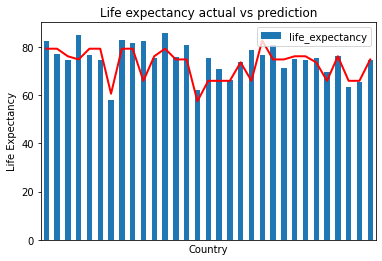

In [ ]:
result.plot(kind='bar',y='life_expectancy')
plt.plot(y_pred, c='red', linewidth=2)
plt.xticks([], [])
plt.ylabel("Life Expectancy")
plt.xlabel("Country")
plt.title("Life expectancy actual vs prediction")
plt.show()

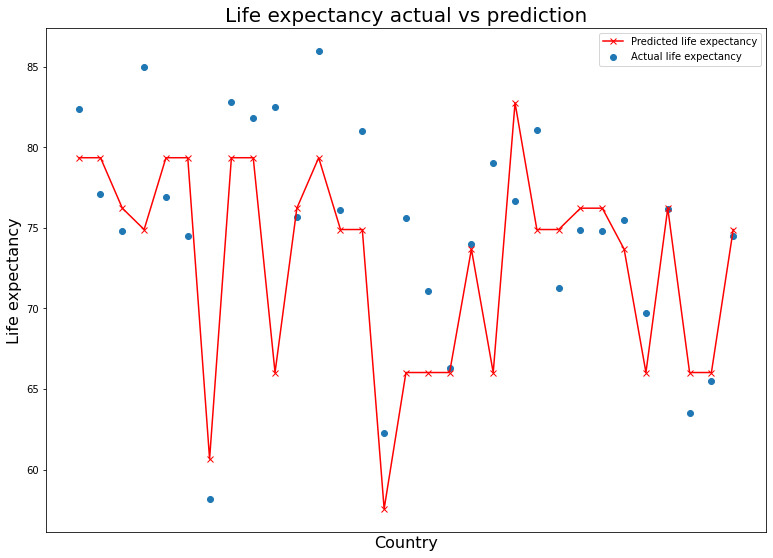

In [ ]:
#Creating a better graph

#create the chart foundation and size
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#give name to y axis, title, x axis
ax.set_ylabel('Life expectancy', fontsize=16)
ax.set_xlabel('Country', fontsize=16)
ax.set_title('Life expectancy actual vs prediction', fontsize=20)
plt.xticks([], [])

# Creating plot
lp = ax.scatter("index", "life_expectancy", data=df_y_actual, label="Actual life expectancy")
lp_pred = ax.plot(y_pred, c="red", marker="x", label="Predicted life expectancy")

# Show legend
plt.legend()

# show plot
plt.draw()

In [ ]:
#import more packages

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#declare X and y

X = pd.DataFrame({
    "alcohol_consumption": inequality['alcohol_consumption'], 
    "fertility_rate": inequality['fertility_rate'], 
    "life_expectancy": inequality['life_expectancy'],
    "happiness_score": inequality['happiness_score'],
    "gdp": inequality["gdp"],
    "population": inequality["population"],
    "education": inequality["education"]
    })
y = pd.DataFrame({
    "gini": inequality['gini']})

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
#Instantiate a Decision Tree Regressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

#Fit dt to training-set
dt.fit(X_train, y_train)

#predict test-set result
y_pred = dt.predict(X_test)

#compute test-set MSE
mse_dt = MSE(y_test, y_pred)

#compute test-set RMSE
rmse_dt = np.sqrt(mse_dt)

#print RMSE
print(rmse_dt)

6.339752261385471


In [ ]:
#compare y_pred and y_test

result = y_test.assign(
    prediction = y_pred
)

print(result)

     gini  prediction
47   32.7   31.115789
3    29.7   33.826316
31   51.0   40.063158
25   44.4   33.826316
15   35.5   38.415385
118  35.4   35.523077
89   32.2   38.415385
6    34.4   33.826316
103  27.5   33.826316
65   39.4   33.826316
88   35.6   40.063158
38   28.2   33.826316
92   39.0   33.826316
53   36.0   33.826316
140  42.3   42.035294
40   27.3   38.415385
72   29.0   33.826316
135  44.7   47.970000
113  47.6   47.970000
42   31.8   35.523077
126  26.5   31.115789
112  35.5   40.063158
141  25.5   33.826316
76   31.8   38.415385
5    32.4   33.826316
109  43.4   47.970000
134  34.0   33.826316
67   45.3   40.063158
57   60.5   42.035294
86   42.8   38.415385
14   38.6   31.115789


In [ ]:
#remove the random index on y_test

y_actual = np.array(y_test)
df_y_actual = pd.DataFrame({
    "index": np.arange(0,31),
    "gini": y_test["gini"]
})

print(df_y_actual)

     index  gini
47       0  32.7
3        1  29.7
31       2  51.0
25       3  44.4
15       4  35.5
118      5  35.4
89       6  32.2
6        7  34.4
103      8  27.5
65       9  39.4
88      10  35.6
38      11  28.2
92      12  39.0
53      13  36.0
140     14  42.3
40      15  27.3
72      16  29.0
135     17  44.7
113     18  47.6
42      19  31.8
126     20  26.5
112     21  35.5
141     22  25.5
76      23  31.8
5       24  32.4
109     25  43.4
134     26  34.0
67      27  45.3
57      28  60.5
86      29  42.8
14      30  38.6


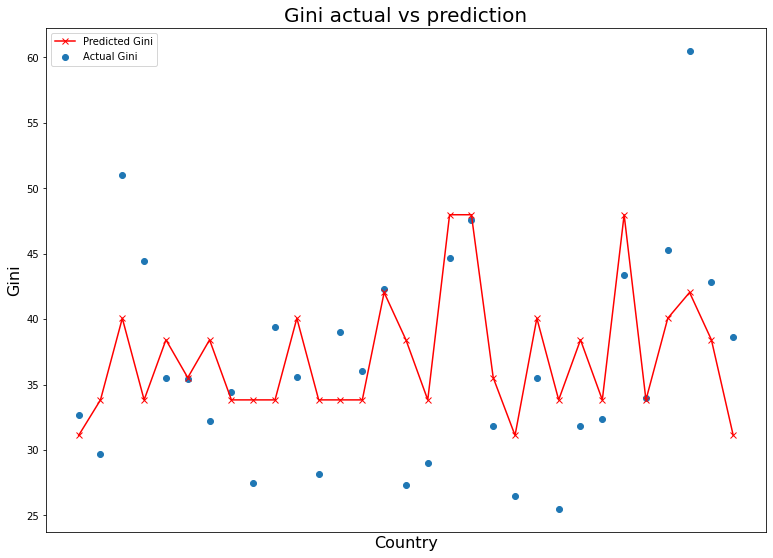

In [ ]:
#Creating a better graph

#create the chart foundation and size
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#give name to y axis, title, x axis
ax.set_ylabel('Gini', fontsize=16)
ax.set_xlabel('Country', fontsize=16)
ax.set_title('Gini actual vs prediction', fontsize=20)
plt.xticks([], [])

# Creating plot
lp = ax.scatter("index", "gini", data=df_y_actual, label="Actual Gini")
lp_pred = ax.plot(y_pred, c="red", marker="x", label="Predicted Gini")

# Show legend
plt.legend()

# show plot
plt.draw()

#Machine Learning with Linear Regression (Andrea's feedback)

In [ ]:
#create new table with all data


inequality = pd.read_sql(
  """

        select 
            g.country,
            c.continent,
            l.Status as status,
            g.gini,
            l.Life_expectancy as life_expectancy,
            f.fertility_rate,
            --a.consumption as alcohol_consumption,
            round(h.Happiness_Score, 2) as happiness_score,
            gdp.gdp,
            p.population,
            d.democracy,
            t.tax_rate,
            e.education
        from gini g
        join happiness h
          on h.Country = g.country
        join life_expectancy l
          on l.Country = g.country
        --join alcohol a
          --on a.country = g.country
        join fertility f
          on f.country = g.country
        join continent c
          on c.country = g.country
        join gdp
          on gdp.country = g.country
        join population p
          on p.country = g.country
        join education e
          on e.country = g.country 
        join democracy d
          on d.country = g.country
        join tax_rate t
          on t.country = g.country
        where e.education is not null
  """, db_conn)

In [ ]:
#import sklearn packages
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#declare X and y
X = pd.DataFrame({
    "fertility_rate": inequality['fertility_rate'], 
    "life_expectancy": inequality['life_expectancy'],
    "happiness_score": inequality['happiness_score']
    })
y = pd.DataFrame({
    "gini": inequality['gini']})

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

#Create Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

#Predict the result
y_pred = reg.predict(X_test)

#Calculate accuracy
acc = round(reg.score(X_test, y_test),2)
print("Model Accuracy:", acc)

#Calculate RMSE
mse_dt = MSE(y_test, y_pred)
rmse_dt = round(np.sqrt(mse_dt),2)
print("RMSE:", rmse_dt)

Model Accuracy: 0.05
RMSE: 6.98


In [ ]:
sns.set_palette(None)

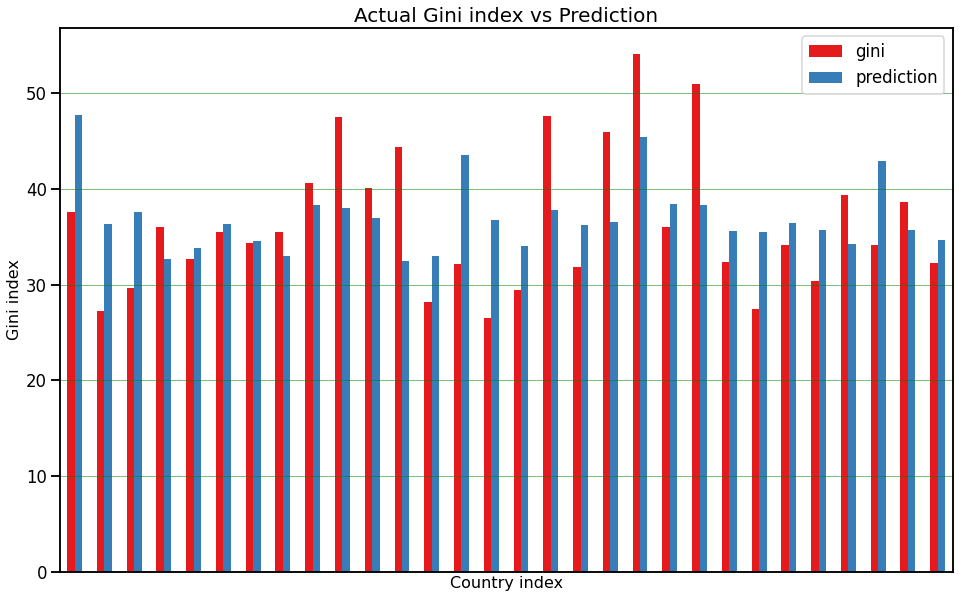

In [ ]:
#graphing the result

result = y_test.assign(
    prediction = y_pred
)

result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Country index', fontsize=16)
plt.ylabel('Gini index', fontsize=16)
plt.title('Actual Gini index vs Prediction', fontsize=20)
plt.xticks([], [])
plt.show()

In [ ]:
#import more packages

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#declare X and y

X = pd.DataFrame({
    #"alcohol_consumption": inequality['alcohol_consumption'], 
    #"fertility_rate": inequality['fertility_rate'], 
    #"life_expectancy": inequality['life_expectancy'],
    #"happiness_score": inequality['happiness_score'],
    "gdp": inequality["gdp"],
    "tax_rate": inequality["tax_rate"],
    "democracy": inequality["democracy"],
    "population": inequality["population"],
    "education": inequality["education"]
    })
y = pd.DataFrame({
    "gini": inequality['gini']})

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

#Create Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

result = y_test.assign(
    prediction = y_pred
)

#Calculate accuracy
acc = round(reg.score(X_test, y_test),2)
print("Model Accuracy:", acc)

#Calculate RMSE
mse_dt = MSE(y_test, y_pred)
rmse_dt = round(np.sqrt(mse_dt),2)
print("RMSE:", rmse_dt)

Model Accuracy: 0.13
RMSE: 6.68


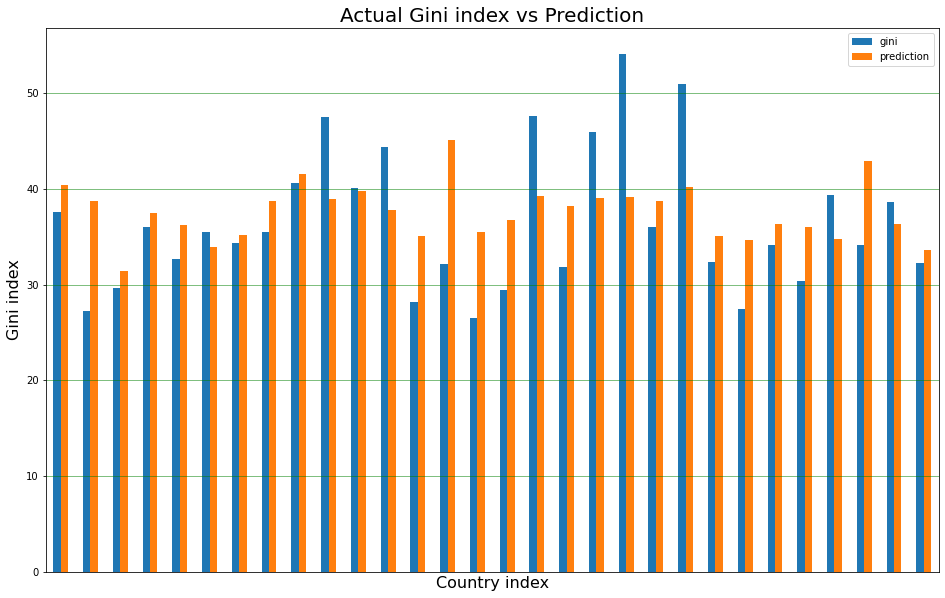

In [ ]:
#graphing the result


result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Country index', fontsize=16)
plt.ylabel('Gini index', fontsize=16)
plt.title('Actual Gini index vs Prediction', fontsize=20)
plt.xticks([], [])
plt.show()

In [ ]:
#import sklearn

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#declare X and y

X = pd.DataFrame({
    "fertility_rate": inequality['fertility_rate'], 
    "gini": inequality['gini'],
    "happiness_score": inequality['happiness_score'],
    "education": inequality["education"]
    })
y = pd.DataFrame({
    "life_expectancy": inequality['life_expectancy']})

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

#Create Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


#Calculate accuracy
acc = reg.score(X_test, y_test)
print("Model Accuracy:", acc)

#Calculate RMSE
mse_dt = MSE(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
print("RMSE:", rmse_dt)

Model Accuracy: 0.785884026124806
RMSE: 3.614519011552157


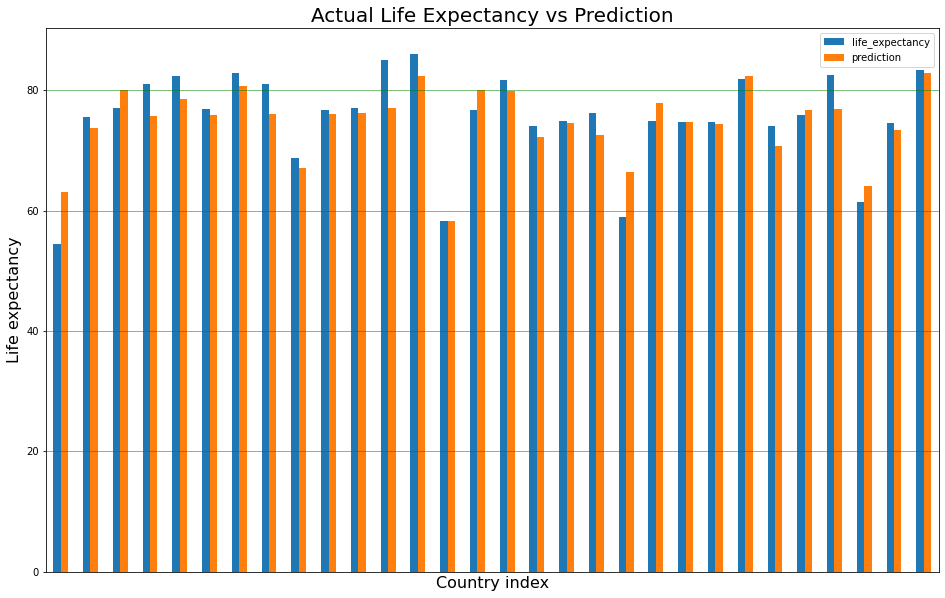

In [ ]:
#graphing the result

result = y_test.assign(
    prediction = y_pred
)
result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Country index', fontsize=16)
plt.ylabel('Life expectancy', fontsize=16)
plt.title('Actual Life Expectancy vs Prediction', fontsize=20)
plt.xticks([], [])
plt.show()

In [ ]:
#remove the random index on y_test

y_actual = np.array(y_test)
df_y_actual = pd.DataFrame({
    "index": np.arange(0,30),
    "life_expectancy": y_test["life_expectancy"]
})

print(df_y_actual)

     index  life_expectancy
99       0             54.5
40       1             75.6
3        2             77.1
53       3             81.0
47       4             82.4
15       5             76.9
6        6             82.8
111      7             81.1
73       8             68.7
87       9             76.7
140     10             77.0
25      11             85.0
38      12             86.0
88      13             58.2
125     14             76.7
89      15             81.7
112     16             74.0
76      17             74.9
41      18             76.2
128     19             58.9
132     20             74.9
31      21             74.8
5       22             74.8
102     23             81.8
68      24             74.1
58      25             75.8
65      26             82.5
77      27             61.4
14      28             74.5
24      29             83.4


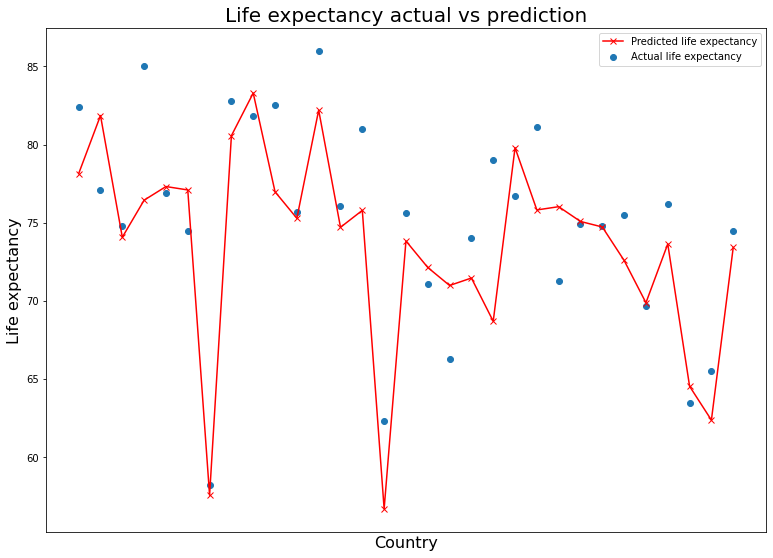

In [ ]:
#Creating a plot

#create the chart foundation and size
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#give name to y axis, title, x axis
ax.set_ylabel('Life expectancy', fontsize=16)
ax.set_xlabel('Country', fontsize=16)
ax.set_title('Life expectancy actual vs prediction', fontsize=20)
plt.xticks([], [])

# Creating plot
lp = ax.scatter("index", "life_expectancy", data=df_y_actual, label="Actual life expectancy")
lp_pred = ax.plot(y_pred, c="red", marker="x", label="Predicted life expectancy")

# Show legend
plt.legend()

# show plot
plt.draw()

#Trying out count plot

In [ ]:
result.to_sql('res_life', db_conn, if_exists='replace', index = False)

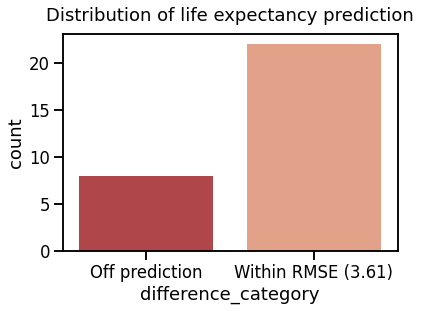

<Figure size 432x288 with 0 Axes>

In [ ]:
rmse_life=round(np.sqrt(mse_dt),2)

sql= (
  """
        with difference as(
          select 
            life_expectancy,
            prediction,
            round(abs(life_expectancy-prediction),2) as diff
          from res_life
        )

        select 
          case when diff = 0 then 'Identical'
          when diff <= ? then 'Within RMSE (' || ? ||')'
          else 'Off prediction' end as difference_category
        from difference

  """)

diff_cat = pd.read_sql_query(sql, db_conn, params=[rmse_life, rmse_life])

sns.set_palette("RdBu")
sns.set_context("talk")

g= sns.countplot(x='difference_category', data=diff_cat)

g.set_title("Distribution of life expectancy prediction", y=1.03)

plt.show()
plt.clf()

In [ ]:
result.to_sql('res_gini1', db_conn, if_exists='replace', index = False)

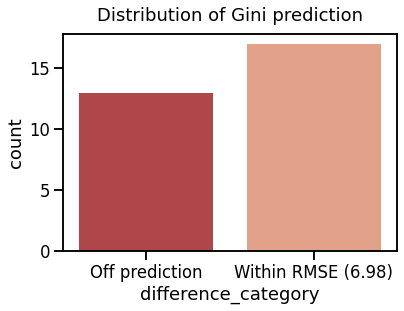

<Figure size 432x288 with 0 Axes>

In [ ]:
rmse_gini1=round(np.sqrt(mse_dt),2)

sql= (
  """
        with difference as(
          select 
            gini,
            prediction,
            round(abs(gini-prediction),2) as diff
          from res_gini1
        )

        select 
          case when diff = 0 then 'Identical'
          when diff <= ? then 'Within RMSE (' || ? ||')'
          else 'Off prediction' end as difference_category
        from difference

  """)

diff_cat = pd.read_sql_query(sql, db_conn, params=[rmse_gini1, rmse_gini1])

sns.set_palette("RdBu")
sns.set_context("talk")

g= sns.countplot(x='difference_category', data=diff_cat)

g.set_title("Distribution of Gini prediction", y=1.03)

plt.show()
plt.clf()

In [ ]:
result.to_sql('res_gini2', db_conn, if_exists='replace', index = False)

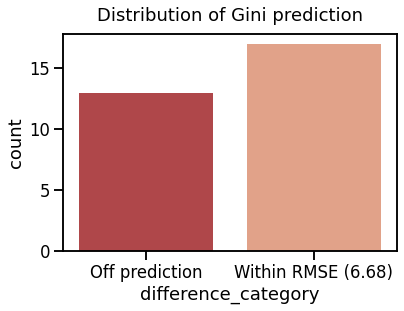

<Figure size 432x288 with 0 Axes>

In [ ]:
rmse_gini2=round(np.sqrt(mse_dt),2)

sql= (
  """
        with difference as(
          select 
            gini,
            prediction,
            round(abs(gini-prediction),2) as diff
          from res_gini1
        )

        select 
          case when diff = 0 then 'Identical'
          when diff <= ? then 'Within RMSE (' || ? ||')'
          else 'Off prediction' end as difference_category
        from difference

  """)

diff_cat = pd.read_sql_query(sql, db_conn, params=[rmse_gini2, rmse_gini2])

sns.set_palette("RdBu")
sns.set_context("talk")

g= sns.countplot(x='difference_category', data=diff_cat)

g.set_title("Distribution of Gini prediction", y=1.03)

plt.show()
plt.clf()